# Ensemble model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import pandas as pd
from datetime import datetime, timedelta
from copy import deepcopy

from modules.training_module import TrainingModule
from model_wrappers.model_factory import ModelFactory
from configs.base_config import TrainingModuleConfig

from nb_utils import train_eval, forecast
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import set_dates

In [3]:
with open('../notebooks/train_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

In [4]:
# region = ['bengaluru urban'] 
# region_type = 'district'
# current_day = datetime.now().date() - timedelta(24)
# forecast_length = 30

# train_eval_plot(region, region_type, 
#                 current_day, forecast_length,
#                 ensemble_train_config, ensemble_test_config,
#                 max_evals = 10, 'tracker_district_daily',
#                 mlflow_log = False, mlflow_run_name = None)

## Train-eval-plot step by step

In [5]:
current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

dates

{'train1_start_date': '5/27/20',
 'train1_end_date': '6/2/20',
 'train1_run_day': '5/26/20',
 'train2_start_date': '6/3/20',
 'train2_end_date': '6/10/20',
 'train2_run_day': '6/2/20',
 'test_start_date': '6/3/20',
 'test_end_date': '6/10/20',
 'test_run_day': '6/2/20'}

In [6]:
default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 100
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "testing"

In [7]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/27/20',
 'train_end_date': '6/2/20',
 'model_class': 'SEIHRD',
 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05},
 'ensemble': 'True',
 'search_space': {'r0': [0.5, 3],
  'EbyCRatio': [0.001, 70],
  'IbyCRatio': [0.001, 2],
  'infectious_period': [1, 10],
  'F_hospitalization': [0, 0.125],
  'F_fatalities': [0.02, 0.12]},
 'search_parameters': {'max_evals': 100},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {'variable': 'deceased', 'weight': 0.25},
   {'variable': 'hospitalized', 'weight': 0.25}]},
 'loss_functions': [{'metric_name': 'mape',
   'variable_weights': [{'variable': 'confirmed', 'weight': 1}]},
  {'metric_name': 'mape',
   'variable_weights': [{'variable': 'hospitalized', 'weight': 1}]},
  {'metric_name': 'mape',
  

In [8]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
  

In [9]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)

In [10]:
training_output = TrainingModule.from_config(train_config)

t = 7.90                                               
t = 7.90                                               
t = 7.90                                                                         
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                               

100%|██████████| 100/100 [00:09<00:00, 10.13trial/s, best loss: 26.6522552628204]
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90


In [11]:
training_output

{'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.23391446709361,
     'F_fatalities': 0.11292259685108472,
     'F_hospitalization': 0.060561063922497285,
     'IbyCRatio': 1.373104868658839,
     'infectious_period': 1.0961269512577576,
     'r0': 2.9876629894763487,
     'LatentEbyCRatio': {'5/26/20': 57.23391446709361,
      '6/2/20': 0.6174689916846146},
     'LatentIbyCRatio': {'5/26/20': 1.373104868658839,
      '6/2/20': 0.23176989357583513}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.23391446709361,
     'F_fatalities': 0.11292259685108472,
     'F_hospitalization': 0.060561063922497285,
     'IbyCRatio': 1.373104868658839,
     'infectious_period': 1.0961269512577576,
     'r0': 2.9876629894763487,
     'LatentEbyCRatio': {'5/26/20': 57.23391446709361,
      '6/2/20': 0.6174689916

In [12]:
ensemble_train_config['model_parameters'].update(training_output['model_parameters']['constituent_models'])

In [13]:
ensemble_train_config['model_parameters'].update(training_output['model_parameters']['constituent_model_losses'])

In [14]:
ensemble_train_config['model_parameters']['with_uncertainty'] = False

In [15]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
  

In [16]:
params, metrics, train1_model_params, train2_model_params = train_eval(['bengaluru urban'], 'district', 
                                                                       train1_start_date, train1_end_date, 
                                                                       train2_start_date, train2_end_date, train2_run_day,
                                                                       test_start_date, test_end_date,
                                                                       ensemble_train_config, ensemble_test_config,
                                                                       max_evals=10, data_source='tracker_district_daily',
                                                                       mlflow_log=False, name_prefix="testing")

t = 7.90                                              
t = 7.90                                              
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90  

In [17]:
params

{'region': 'bengaluru urban',
 'region_type': 'district',
 'train1_start_date': '5/27/20',
 'train1_end_date': '6/2/20',
 'train2_start_date': '6/3/20',
 'train2_end_date': '6/10/20',
 'run_day': '6/2/20',
 'test_start_date': '6/3/20',
 'test_end_date': '6/10/20',
 'data_source': 'tracker_district_daily'}

In [18]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 170.47611483908165,
 'Train1_mape_confirmed': 6.470241198601072,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_hospitalized': 80.37760634370929,
 'Train1_mape_hospitalized_weight': 1.0,
 'Train1_mape_recovered': 74.05625410184747,
 'Train1_mape_recovered_weight': 1.0,
 'Train1_mape_deceased': 9.572013194923809,
 'Train1_mape_deceased_weight': 1.0,
 'TestMAPE': 190.85227669054396,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 6.462752833936343,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_hospitalized': 80.4723972979139,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 59.27401846436465,
 'Test_mape_recovered_weight': 1.0,
 'Test_mape_deceased': 6.4726527562202705,
 'Test_mape_deceased_weight': 1.0,
 'Train2MAPE': 152.68182135243515,
 'Train2RMLSE': 0,
 'Train2_mape_confirmed': 6.462752833936341,
 'Train2_mape_confirmed_weight': 1.0,
 'Train2_mape_hospitalized': 80.4723972979139,
 'Train2_mape_hospitalized_weight': 1.0,
 'Train2_mape_r

In [19]:
train1_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [20]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [21]:
forecast_start_date = '6/2/20'
forecast_length = 30
forecast_run_day = (datetime.strptime(forecast_start_date, "%m/%d/%y") - timedelta(days=1)).strftime("%-m/%-d/%y")
forecast_end_date = (datetime.strptime(forecast_start_date, "%m/%d/%y") + timedelta(days=forecast_length)).strftime("%-m/%-d/%y")

In [22]:
forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90


prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final
0,6/2/20,115.457581,3.176167,312.338348,9.460369,385.322064,63.523348,63.523348,32.799366,321.798717
1,6/3/20,106.531002,1.995823,358.272236,10.851653,409.040347,39.916458,39.916458,31.249568,369.123889
2,6/4/20,98.520737,1.502516,389.549156,11.798995,431.398478,30.050327,30.050327,29.384224,401.348151
3,6/5/20,91.249807,1.268056,414.430041,12.552608,452.343767,25.361117,25.361117,27.403587,426.982650
4,6/6/20,84.554258,1.130425,436.012818,13.206326,471.827638,22.608495,22.608495,25.493070,449.219144
5,6/7/20,78.389255,1.032880,455.498205,13.796516,489.952321,20.657600,20.657600,23.652356,469.294721
6,6/8/20,72.670667,0.951670,473.382707,14.338217,506.754319,19.033396,19.033396,21.949453,487.720923
7,6/9/20,67.373284,0.880430,489.892955,14.838293,522.339850,17.608602,17.608602,20.362655,504.731248
8,6/10/20,62.473949,0.816128,505.183682,15.301432,536.807678,16.322564,16.322564,18.871498,520.485114
9,6/11/20,57.922659,0.756152,519.356776,15.730718,550.210528,15.123033,15.123033,17.502695,535.087495


t = 7.90
t = 7.90
t = 8.90
t = 8.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


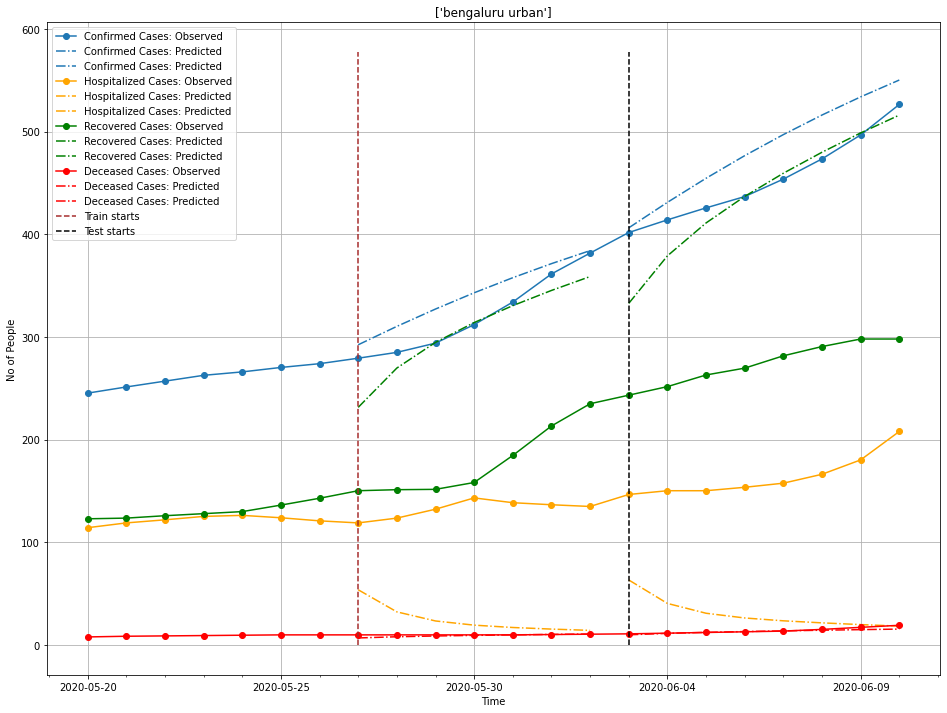

In [23]:
plot_m1(train1_model_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm1.png')

t = 8.90
t = 8.90


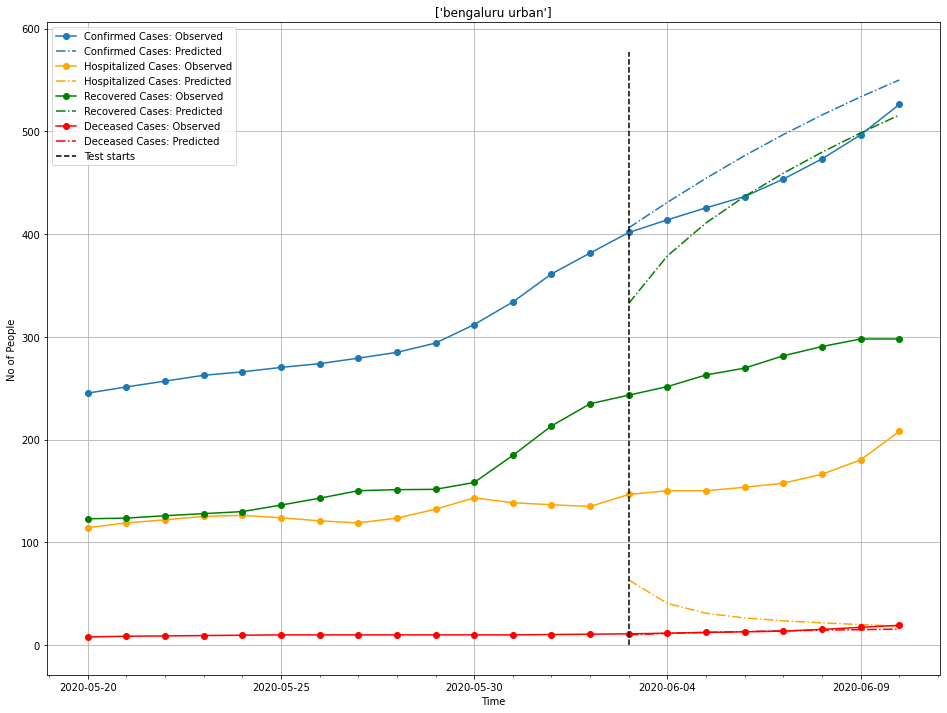

In [24]:
plot_m2(train2_model_params, train1_start_date, train1_end_date,
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm2.png')

t = 31.90
t = 31.90


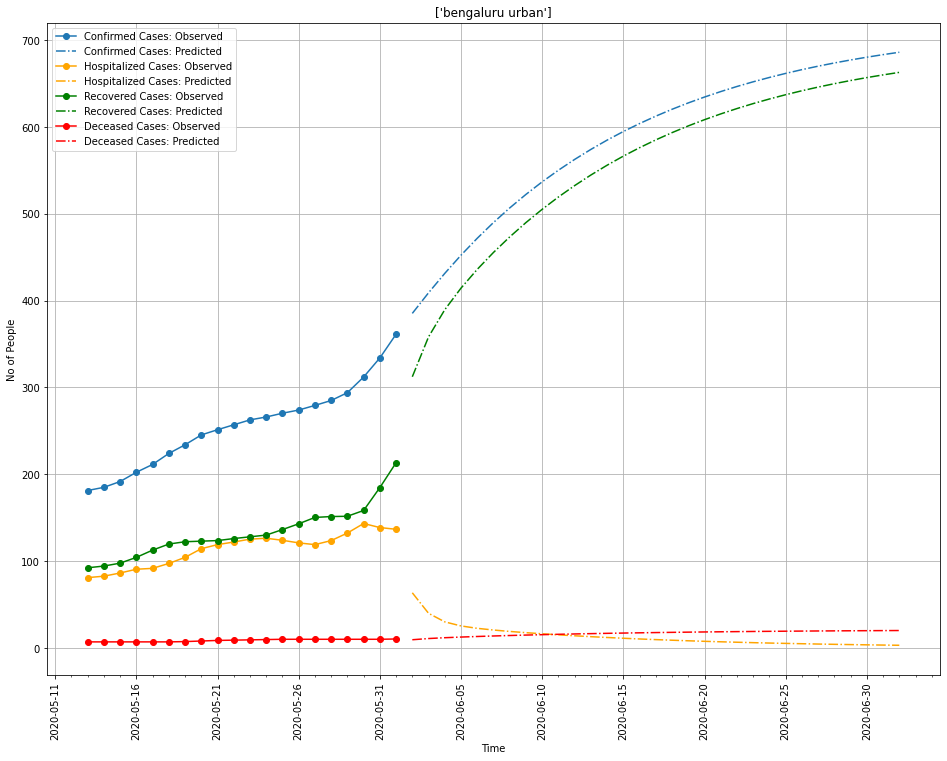

In [25]:
plot_m3(train2_model_params, train1_start_date, 
        forecast_start_date, forecast_length, 
        rolling_average = False, uncertainty = False,
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm3.png')

In [26]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [27]:
train2_model_params['model_parameters']['with_uncertainty'] = True

In [28]:
train2_model_params['model_parameters']['uncertainty_parameters'] = {
            "include_mean": "True",
            "percentiles": [10, 20, 30, 40, 50, 60, 70, 80, 90],
            "ci": 95,
            "date_of_interest": "6/3/20",
            "column_of_interest": "hospitalized",
            "window": 5
        }

In [29]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [30]:
uncertainty_df = forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90


In [31]:
pd.set_option("display.max_columns", None)
uncertainty_df

prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,predictionDate,Region Type,Region,Country,Lat,Long,active_10,hospitalized_10,icu_10,recovered_10,deceased_10,total_10,active_20,hospitalized_20,icu_20,recovered_20,deceased_20,total_20,active_30,hospitalized_30,icu_30,recovered_30,deceased_30,total_30,active_40,hospitalized_40,icu_40,recovered_40,deceased_40,total_40,active_50,hospitalized_50,icu_50,recovered_50,deceased_50,total_50,active_60,hospitalized_60,icu_60,recovered_60,deceased_60,total_60,active_70,hospitalized_70,icu_70,recovered_70,deceased_70,total_70,active_80,hospitalized_80,icu_80,recovered_80,deceased_80,total_80,active_90,hospitalized_90,icu_90,recovered_90,deceased_90,total_90,active_low,hospitalized_low,icu_low,recovered_low,deceased_low,total_low,active_high,hospitalized_high,icu_high,recovered_high,deceased_high,total_high
0,6/2/20,115.458,3.17617,312.338,9.46037,385.322,63.5233,63.5233,32.7994,321.799,6/2/20,NaN,NaN,NaN,NaN,NaN,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322,63.5233,63.5233,1.27047,312.338,9.46037,385.322
1,6/3/20,106.531,1.99582,358.272,10.8517,409.04,39.9165,39.9165,31.2496,369.124,6/3/20,NaN,NaN,NaN,NaN,NaN,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04,39.9165,39.9165,0.798329,358.272,10.8517,409.04
2,6/4/20,98.5207,1.50252,389.549,11.799,431.398,30.0503,30.0503,29.3842,401.348,6/4/20,NaN,NaN,NaN,NaN,NaN,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398,30.0503,30.0503,0.601007,389.549,11.799,431.398
3,6/5/20,91.2498,1.26806,414.43,12.5526,452.344,25.3611,25.3611,27.4036,426.983,6/5/20,NaN,NaN,NaN,NaN,NaN,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344,25.3611,25.3611,0.507222,414.43,12.5526,452.344
4,6/6/20,84.5543,1.13042,436.013,13.2063,471.828,22.6085,22.6085,25.4931,449.219,6/6/20,NaN,NaN,NaN,NaN,NaN,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,13.2063,471.828,22.6085,22.6085,0.45217,436.013,1